# Titanic Data Analysis

In this project of Titanic Data, analysis has to be done on deaths of peoples on boards of the ship. We have to study that what criteria defines his/her survival or death rate among the peoples on board the ship. We will examine based on the sex of a person, based on the ticket fare or Class of the person. Also we would like to anlayse the survival rate depending upon the age of a person.
The we will perform comparative analysis among males and females for survival judgement based on their Age and Class.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
desired_width = 360
pd.set_option('display.width', desired_width)

dataset = pd.read_csv(r"titanic-data.csv")


     PassengerId  Survived  Pclass                              Name   Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked
497          180         0       3               Leonard, Mr. Lionel  male  36.0      0      0    LINE   0.0   NaN        S
768          278         0       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0  239853   0.0   NaN        S
536          823         0       1   Reuchlin, Jonkheer. John George  male  38.0      0      0   19972   0.0   NaN        S
846          634         0       1     Parr, Mr. William Henry Marsh  male   NaN      0      0  112052   0.0   NaN        S
811          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0  239854   0.0   NaN        S


C:\Users\manje_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


# Data Wrangling

Here we will perform data cleanup, remove/modify any corrupt/missing data. After that we will reduce the large dataset to the minimal required by data filtering.

In [82]:
dataset = dataset.sort('Fare')
print dataset.head()

     PassengerId  Survived  Pclass                             Name   Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked
497          180         0       3              Leonard, Mr. Lionel  male  36.0      0      0    LINE   0.0   NaN        S
807          467         0       2            Campbell, Mr. William  male   NaN      0      0  239853   0.0   NaN        S
768          278         0       2      Parkes, Mr. Francis "Frank"  male   NaN      0      0  239853   0.0   NaN        S
536          823         0       1  Reuchlin, Jonkheer. John George  male  38.0      0      0   19972   0.0   NaN        S
846          634         0       1    Parr, Mr. William Henry Marsh  male   NaN      0      0  112052   0.0   NaN        S


C:\Users\manje_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [83]:
print "Total Dataset rows: ", len(dataset)
print "No. of Null in 'Age' Column: ", len(dataset[(dataset['Age'].isnull())])
print "No. of Null in 'Sex' Column: ", len(dataset[(dataset['Sex'].isnull())])
print "No. of Null in 'Fare' Column: ", len(dataset[(dataset['Fare'].isnull())])
print "No. of Null in 'Survived' Column: ", len(dataset[(dataset['Survived'].isnull())])

Total Dataset rows:  891
No. of Null in 'Age' Column:  177
No. of Null in 'Sex' Column:  0
No. of Null in 'Fare' Column:  0
No. of Null in 'Survived' Column:  0


Hence, it can be concluded that there are 177 records with NULL value in age columns. For all other variables, there is no NULL value. Since, we cannot assume any age value for these hence we will exclude them from our study.

In [84]:
dataset = dataset[dataset['Age'].notnull()]
print len(dataset)

714


In [85]:
#......Data Filteration

fdataset = dataset.filter(['PassengerId','Survived','Pclass','Sex','Age','Sibsp','Fare'])
fdataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
497,180,0,3,male,36.0,0.0
536,823,0,1,male,38.0,0.0
151,303,0,3,male,19.0,0.0
556,264,0,1,male,40.0,0.0
282,272,1,3,male,25.0,0.0


# Data Exploration
### Q1: Who has highest chance of survival ? Men, Womens or Kids 
In the next section we will explore what is survival rate among the men, womens and kids exclusively. The catagory of kid is included separaqtely because kids are given equal importance regardless of their sex for survival preferences. Extracting Data for Mens, Womens and Kids. Kids are assumed for all pasengers with age less than 15 yea

In [50]:
#Extracting Data for Mens, Womens and Kids. Kids are assumed for all pasengers with age less than 15 years.
dataset_m = dataset[dataset['Sex']=='male']
dataset_f = dataset[dataset['Sex']=='female']
kidage_bar = 15
dataset_kid = dataset[dataset['Age']<=kidage_bar]
#print dataset_kid

pop_f = len(dataset_f)
pop_m = len(dataset_m)
pop_kid = len(dataset_kid)

#Extracting Survived population count for Males, females and Kids separately.
survived_f = dataset_f[dataset_f['Survived']==1].__len__()
survived_m = dataset_m[dataset_m['Survived']==1].__len__()
survived_kid = dataset_kid[dataset_kid['Survived']==1].__len__()

In [51]:
#Plotting bar chart for analysing the survival rate among mens, womens and kids.

Populating the interactive namespace from numpy and matplotlib
453.0
261.0
69.0


C:\Users\manje_000\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'axis', 'bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


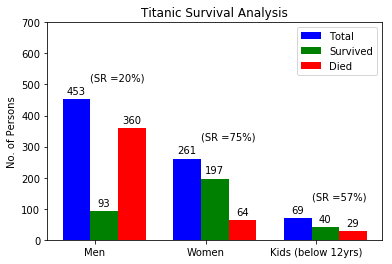

In [86]:
"""************************************************************"""
"""***Bar Chart*******************"""
%pylab inline

#........Function for labelling the bars in the barchart 
def autolabel(bars,axis):
    """
    Attach a text label above each bar displaying its height
    """
    for bar in bars:
        height = bar.get_height()
        axis.text(bar.get_x() + bar.get_width()/2., 10+height,
                '%d' % int(height),
                ha='center', va='bottom')


survived_data = (survived_m,survived_f,survived_kid)     #.............. Tupple for men, womens and kids who have survived
died_data = (pop_m-survived_m,pop_f-survived_f,pop_kid-survived_kid) #...Tupple for men, womens and kids who have died
total_data = (pop_m,pop_f,pop_kid)          #............................Tupple for total men, womens and kids on ship
fig, axis = plt.subplots()      
width = 0.25     #............Width of bars in bar-chart
index = np.arange(3)  #.......Defining positions of bars

#....... bar1 = total popultion ,  bar2 = survived population ,  bar3 = Died population  
bar1 = axis.bar(index, total_data, width,color = 'b', label= 'Total')   
bar2 = axis.bar(index + width, survived_data, width,color = 'g', label='Survived')
bar3 = axis.bar(index + 2*width, died_data, width,color = 'r', label='Died')

#...... calling autolabel function for labelling the hieght of each bars.
autolabel(bar1,axis) 
autolabel(bar2,axis)
autolabel(bar3,axis)

for bar, survived, total in zip(bar1, survived_data, total_data):
    height = bar.get_height()  #......  Getting hieght of bar
    print height
    percent_survived = 100*survived/total
    axis.text(bar.get_x()+3*width/3, 60+height, "(SR ={0}%)".format(int(percent_survived)))#, ha='center')
    

# add some text for labels, title and axes ticks

axis.set_ylabel('No. of Persons')
axis.set_title('Titanic Survival Analysis')
axis.set_xticks(index + 2*width / 3)
axis.set_xticklabels(('Men', 'Women', 'Kids (below {0}yrs)'.format(kidage_bar)))
plt.ylim(0,700)

axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))

The sruvival rate among females is much higher than that of males. It is as high as 75% for females. But males suffered hughly this disaster. Their survival rate was as low as 20% of all. This can be attributed to the fact that females were given more preference in providing them access the life saving boats, jacket etc compared to males. <b> It has been observed that kids regardless of their sex had a good survival rate but not as good as adult females. This may be because small kids or infants may succumbed the harsh climating condition of icy cold water and weather.

### Q2: Chances of survival based on fare catagory ?
There are huge chances that survival rate might be higher in case of VIP passengers as they might have got the higher preference to survival tools like lifejackets or lifeboats to escape death. I the following section, we will filter data based on the ticket fares of the passengers regardeless of their sex and perform the analysis. 

Analyzing survival rate based on the closs catagory decided upon the fare of tickets. The analysis was done on five catagories: 
<br>1) Zero fare, probably staff persons(fare : 0), 
<br>2) Lower Class (fare < 10), 
<br>3) LowerMiddleClass(fare: b/w(10-25), 
<br>4) UpperMiddleClass (fare b/w : 25-50) and 
<br>5) UpperClass(fare above 50).

In [101]:

#Since we will analyse the survival rate for males and females separately depending upon their class or ticket fare it is better
#the write a function to extract data from the large titanic dataset

def extract_dataset_ByFare(dataset_tp):
    
    freeClassDB = dataset_tp[dataset_tp['Fare']== 0]
    lowClassDB = dataset_tp[dataset_tp['Fare']<10]
    midClassDB_1 = dataset_tp[dataset_tp['Fare'].apply(lambda x: True if (x>10 and x<25) else False)]
    midClassDB_2 = dataset_tp[dataset_tp['Fare'].apply(lambda x: True if (x>25 and x<50) else False)]
    upperClassDB = dataset_tp[dataset_tp['Fare'].apply(lambda x: True if (x>50) else False)]

    survival = np.array([len(freeClassDB[freeClassDB['Survived']==1]),
                    len(lowClassDB[lowClassDB['Survived']==1]),
                    len(midClassDB_1[midClassDB_1['Survived']==1]),
                    len(midClassDB_2[midClassDB_2['Survived']==1]),
                    len(upperClassDB[upperClassDB['Survived']==1]) ])


    death = np.array([len(freeClassDB[freeClassDB['Survived']==0]),
             len(lowClassDB[lowClassDB['Survived']==0]),
             len(midClassDB_1[midClassDB_1['Survived']==0]),
             len(midClassDB_2[midClassDB_2['Survived']==0]),
             len(upperClassDB[upperClassDB['Survived']==0])])

    count = survival + death
    
    return survival, death, count


# Another function that extracts data based upon the age catagory with bats at 0, 10, 18, 35,50 and above

def extract_dataset_ByAge(dataset_tp):
    
    small_kidsDB = dataset_tp[dataset_tp['Age']<10]
    young_kidsDB = dataset_tp[dataset_tp['Age'].apply(lambda x: True if (x>10 and x<18) else False)]
    youngDB_1 = dataset_tp[dataset_tp['Age'].apply(lambda x: True if (x>18 and x<35) else False)]
    youngDB_2 = dataset_tp[dataset_tp['Age'].apply(lambda x: True if (x>35 and x<50) else False)]
    oldDB = dataset_tp[dataset_tp['Age'].apply(lambda x: True if (x>50) else False)]

    survival = np.array([len(small_kidsDB[small_kidsDB['Survived']==1]),
                    len(young_kidsDB[young_kidsDB['Survived']==1]),
                    len(youngDB_1[youngDB_1['Survived']==1]),
                    len(youngDB_2 [youngDB_2 ['Survived']==1]),
                    len(oldDB[oldDB['Survived']==1]) ])


    death = np.array([len(small_kidsDB[small_kidsDB['Survived']==0]),
             len(young_kidsDB[young_kidsDB['Survived']==0]),
             len(youngDB_1[youngDB_1['Survived']==0]),
             len(youngDB_2[youngDB_2['Survived']==0]),
             len(oldDB[oldDB['Survived']==0]) ])

    count = survival+death
    
    return survival, death, count
        


71


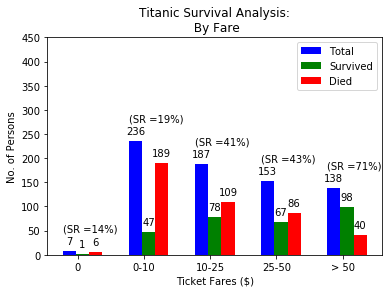

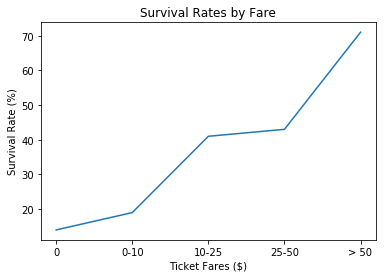

In [102]:
# Extracting data of survived travellers based upon there fares catagory, and Ploting the same

survival_byClass, death_byClass, count_byClass = extract_dataset_ByFare(dataset)
survival_Rate_t = 100*survival_byClass/count_byClass


#Initiating plot function from Matplotlib
fig, axis = plt.subplots()
width = 0.2  # ............Width of bars in bar-chart
index = np.arange(5)  # .......Defining positions of bars

# ....... bar1 = total popultion ,  bar2 = survived population ,  bar3 = Died population
bar1 = axis.bar(index, count_byClass, width, color='b', label='Total')
bar2 = axis.bar(index + width, survival_byClass, width, color='g', label='Survived')
bar3 = axis.bar(index + 2 * width, death_byClass, width, color='r', label='Died')


# ...... calling autolabel function for labelling the hieght of each bars.
autolabel(bar1,axis)
autolabel(bar2,axis)
autolabel(bar3,axis)



for bar, survived, total in zip(bar1, survival_byClass, count_byClass):
    height = bar.get_height()        # ..................  Getting hieght of bar
    percent_survived = 100 * survived / total
    axis.text(bar.get_x(), 40 + height, "(SR ={0}%)".format(int(percent_survived)))  # , ha='center')

# add some text for labels, title and axes ticks
print percent_survived
axis.set_ylabel('No. of Persons')
axis.set_xlabel('Ticket Fares ($)')
axis.set_title('Titanic Survival Analysis:\n By Fare')
axis.set_xticks(index + 2 * width / 3)
axis.set_xticklabels(('0',r'0-10', r'10-25', r'25-50',r'> 50'))
plt.ylim(0, 450)

axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))


plt.figure(figsize = (6,4))
plt.plot(index,survival_Rate_t)

plt.ylabel('Survival Rate (%)')
plt.xlabel('Ticket Fares ($)')
plt.title('Survival Rates by Fare')
plt.xticks(index,('0',r'0-10', r'10-25', r'25-50',r'> 50'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

CONCLUSION: It is hence concluded that the survival rate is higher in higher travel-class. In the lower class death rate is too high i.e. approx 80% and above. In the above chart SR represent 'Survival Rate' in %. Death is even higher around 95% for those who hd zero ticket fares, These were all male members, and probably suppport staff, which got least of life saving opportunity.

### Q3: Analyzing Survival rate of kids based on their age. 

<function __main__.f>

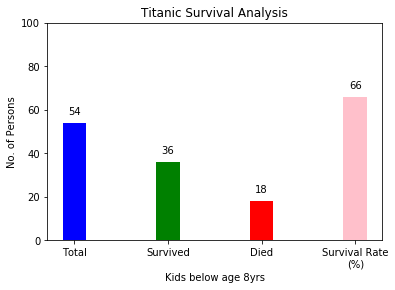

In [103]:
#Designing an interactive Jupyter wizard that create an interactive slide bar, that sets the threshold value of kids that has
#to be analysed for its survival. The max value for kid is kept as 15yrs

from IPython.display import display
from ipywidgets import widgets

#Defining function to run the code along with interactive slidebar.
def f(AgeBar):
    dataset_kid = dataset[dataset['Age']<=AgeBar]
    pop_kid = len(dataset_kid)
    survived_kid = dataset_kid[dataset_kid['Survived']==1].__len__()
    survivalRate_kid = int(100*survived_kid/pop_kid)
    data = (pop_kid, survived_kid, pop_kid-survived_kid, survivalRate_kid )     #.............. Tupple for kids who have survived
       
    width = 0.25     #............Width of bars in bar-chart
    index = np.arange(4)  #.......Defining positions of bars
    barcolor = ['b','g','r','pink']
    fig, axis = plt.subplots()  
    i=0

#....... bar1 = total popultion ,  bar2 = survived population ,  bar3 = Died population  
    bars = axis.bar(index, data, width, color=barcolor)
    for bar in bars:
        height = bar.get_height()
        axis.text(bar.get_x() + bar.get_width() / 2., 3 + height, '%d' % int(height), ha='center', va='bottom')             
    

# add some text for labels, title and axes ticks

    axis.set_ylabel('No. of Persons')
    axis.set_xlabel('Kids below age {0}yrs'.format(AgeBar))
    axis.set_title('Titanic Survival Analysis')
    axis.set_xticks(index)
    axis.set_xticklabels(('Total','Survived', 'Died', 'Survival Rate\n(%)'))
    plt.ylim(0,100)

# axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))


widgets.interact(f, AgeBar =[1,15,1])

### Q4: Analyzing Survival rate of male survivor based on their class catagory.i.e. LowerClass, lowermiddleClass, UpperMiddleClass and UpperClass 

In [104]:
survival_byClass_m, death_byClass_m, count_byClass_m = extract_dataset_ByFare(dataset_m)

#.... Generating array having percent survived(Survival Rate in each class)
survival_RatebyClass_m = 100*survival_byClass_m/count_byClass_m

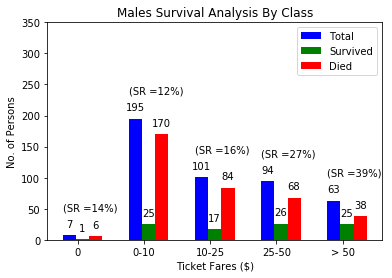

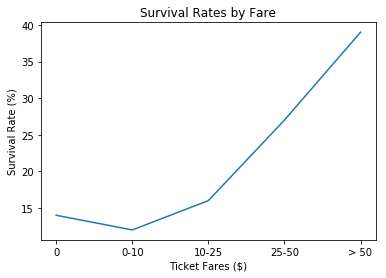

In [105]:
plt.figure(figsize = (9,15))
fig, axis = plt.subplots()
width = 0.2  # ............Width of bars in bar-chart
index = np.arange(5)  # .......Defining positions of bars


# ....... bar1 = total popultion ,  bar2 = survived population ,  bar3 = Died population
bar1 = axis.bar(index, count_byClass_m, width, color='b', label='Total')
bar2 = axis.bar(index + width, survival_byClass_m, width, color='g', label='Survived')
bar3 = axis.bar(index + 2 * width, death_byClass_m, width, color='r', label='Died')


# ...... calling autolabel function for labelling the hieght of each bars.
autolabel(bar1,axis)
autolabel(bar2,axis)
autolabel(bar3,axis)

for bar, survived, total in zip(bar1, survival_byClass_m, count_byClass_m):
    height = bar.get_height()        # ..................  Getting hieght of bar
    percent_survived = 100 * survived / total
    axis.text(bar.get_x(), 40 + height, "(SR ={0}%)".format(int(percent_survived)))  # , ha='center')

# add some text for labels, title and axes ticks

axis.set_ylabel('No. of Persons')
axis.set_xlabel('Ticket Fares ($)')
axis.set_title('Males Survival Analysis By Class')
axis.set_xticks(index + 2 * width / 3)
axis.set_xticklabels(('0',r'0-10', r'10-25', r'25-50',r'> 50'))
plt.ylim(0, 350)

axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))

plt.figure(figsize = (6,4))
plt.plot(index,survival_RatebyClass_m)

plt.ylabel('Survival Rate (%)')
plt.xlabel('Ticket Fares ($)')
plt.title('Survival Rates by Fare')
plt.xticks(index,('0',r'0-10', r'10-25', r'25-50',r'> 50'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




It is clearly evident from the above results that male suffered the most among all, with maximum survival rate of 40% (among hgh fare catagory) and least (around 10%) with zero or low fare catagory. The zero fare can be attributed to people which were part of staff of the crew, and their first job was the survival of other members rather than their own. Hence they ahd the least survived. The passenger with low ticket fare were the maximum of all, and were given least access to life saving tools like boat or lifejackets beacuse of limited resources. The high fare passengers were preferrentially considered for saving life beacuse of thier possible VIP status. It is concluded that when we consider the class of passengers, the survival of males is least of all.

### Q5: Comparative analysis for survival rate of male, female and kids survivor based on their class catagory.i.e. LowerClass, lowermiddleClass, UpperMiddleClass and UpperClass 

In [112]:
#Extracting the data for females traveller in terms of no. of survived

survival_byClass_f, death_byClass_f, count_byClass_f = extract_dataset_ByFare(dataset_f)

#.... Generating array having percent survived(Survival Rate in each class)
survival_RateClass_f = 100*survival_byClass_f/count_byClass_f

C:\Users\manje_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in divide


In [113]:
# Analyzing Survival rate of kids based on their class catagory.i.e. LowerClass, lowermiddleClass, UpperMiddleClass and 
# UpperClass 

survival_byClass_kid, death_byClass_kid, count_byClass_kid = extract_dataset_ByFare(dataset_kid)

#.... Generating array having percent survived(Survival Rate in each class)
survival_RateClass_kid = 100*survival_byClass_kid/count_byClass_kid

C:\Users\manje_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in divide


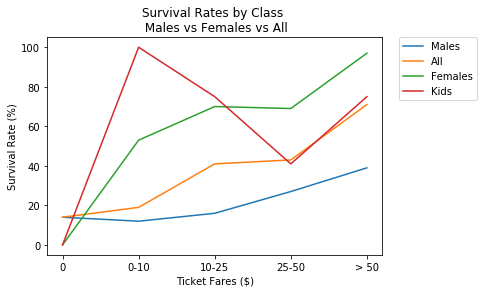

In [114]:
#axis2 = axis.twinx()
plt.figure(figsize = (6,4))
plt.plot(index,survival_RateClass_m, label = 'Males')
plt.plot(index, survival_Rate_t, label = 'All')
plt.plot(index, survival_RateClass_f, label = 'Females')
plt.plot(index, survival_RateClass_kid, label = 'Kids')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Ticket Fares ($)')
plt.title('Survival Rates by Class \n Males vs Females vs All')
plt.xticks(index,('0',r'0-10', r'10-25', r'25-50',r'> 50'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))


plt.show()

Hence it can be concluded that survival rate is least when the ticket fare is least, and increases as fares of ticket increases. This rate is much less among mens as compared to females. Among mens, the survival chance is below 10% for 
low fare ticket holders and goes maximum to around 36%. This survival rate is highest among females, which is as high as above 60% for low fares and goes upto 90% survived for the high cost ticket fares. THis may be possible because first accress to life saving equipments were given to females and childrens, and probably to those having high cost tickets class i.e. VIPs. 

### Comparison of survival rate among males and females depending on their age

In [115]:
#Extracting the data for males traveller in terms of no. of survived depending on the AGE factor

survival_byAge_m, death_byAge_m, count_byAge_m = extract_dataset_ByAge(dataset_m)

#.... Generating array having percent survived(Survival Rate in each class)
survival_RateAge_m = 100*survival_byAge_m/count_byAge_m

In [116]:
#Extracting the data for females traveller in terms of no. of survived depending on the AGE factor

survival_byAge_f, death_byAge_f, count_byAge_f = extract_dataset_ByAge(dataset_f)

#.... Generating array having percent survived(Survival Rate in each class)
survival_RateAge_f = 100*survival_byAge_f/count_byAge_f

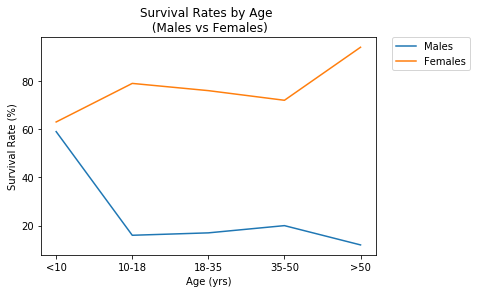

In [117]:
plt.figure(figsize = (6,4))
plt.plot(index,survival_RateAge_m, label = 'Males')
plt.plot(index, survival_RateAge_f, label = 'Females')

plt.ylabel('Survival Rate (%)')
plt.xlabel('Age (yrs)')
plt.title('Survival Rates by Age \n (Males vs Females)')
plt.xticks(index,('<10',r'10-18', r'18-35', r'35-50',r'>50'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


axis.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Survived', 'Died'))


plt.show()

The above figure clearly lays down the complete pictures of Titanic Survival analysis. Survival rate among females is way higher than that of males. For small kids (Age< 10 yrs) the survival rate for both males and females i.e. kids are almost equal. Similarly the survival rate for elderly mens is also higher ( above 50%) among males. The young males lot between 18yrs and 35 yrs has the least of all survivors with death percentage as high as 80-85%.

# Conclusion
### Higher class Female has the highest (90%) chance of survial. Lower class males has the least (10%)

With the above analysis with different angle we are arrived at a following conclusive/tentetive points:
<br>1) The Survival rate among females are much higher when compared to males in all of the class/fare catagory.
<br>2) Kids across the sex have a high chance of survival compared to males but lesser than females. This can be attributed to the fact the smaller kids tend to fail to escape harsher climatic conditions during titanic breakdown.
<br>3) When viewed across the class/ fare catagory, it was found that as the ticket fare increases, the percentage survived increased. The passenger with zero fare were least ( least 10%) survived. Passenger with premium class catogry having higher fares were most survived among all. This may be attributed to the fact the VIP passengers were given girst access to life saving amenities. 

###  Limitations :
There were couple of limitation in tha dataset and in our analysis that can effect the total outcome slightly:
<br>1) Of the total records 0f 891 enteries, 177 has None value in Age column. Hence those data were excluded from our study, thus limiting the accuracy of our conclusions to a certain extent.
<br>2) We have considered the age bar for kids as 15yrs in our study. The variation across this threshold may alter the results by small extend. Though we have provided an interactive slide bar for setting the age bar below age=15, and study the survival rate for the same.